# Multi-Material Thermochemical Heat Storage Simulation

This notebook simulates a high-temperature thermochemical heat storage system using multiple materials. 
We explore how different materials can be combined to enhance energy storage and tailor discharge characteristics.


## Introduction

Thermochemical materials store and release heat via reversible chemical reactions. By combining multiple materials:
- The total energy density can be increased.
- The operational temperature range can be broadened.
- The output temperature can be tuned according to system pressure.

This notebook will:
1. Define properties of multiple thermochemical materials.
2. Calculate equilibrium pressure as a function of temperature.
3. Estimate energy density per material.
4. Visualize results for single and combined materials.


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Define thermochemical materials ----------------
# Material properties: (delta_H [kJ/mol], delta_S [J/mol·K], T_range [°C])
materials = {
    "Material 1": {"delta_H": 150, "delta_S": 120, "T_range": (200, 400)},
    "Material 2": {"delta_H": 220, "delta_S": 160, "T_range": (300, 500)},
}

print("Defined materials and properties:")
for mat, props in materials.items():
    print(f"{mat}: ΔH={props['delta_H']} kJ/mol, ΔS={props['delta_S']} J/mol·K, T_range={props['T_range']} °C")


Defined materials and properties:
Material 1: ΔH=150 kJ/mol, ΔS=120 J/mol·K, T_range=(200, 400) °C
Material 2: ΔH=220 kJ/mol, ΔS=160 J/mol·K, T_range=(300, 500) °C


In [2]:
# Equilibrium Functions
# ---------------- Functions ----------------
def equilibrium_pressure(delta_H, delta_S, T):
    """
    Van 't Hoff relation: ln(P) = -ΔH/(R*T) + ΔS/R
    P in bar, T in K
    """
    R = 8.314  # J/mol·K
    T_K = T + 273.15
    lnP = (-delta_H * 1000) / (R * T_K) + delta_S / R
    return np.exp(lnP)

def equilibrium_temperature(delta_H, delta_S, P):
    """
    Solve Van 't Hoff for T given P (bar)
    """
    R = 8.314
    return (-delta_H * 1000 / (R * np.log(P)) + delta_S / R) - 273.15

def energy_density(delta_H, n_mol=1):
    """Energy per mole in kJ"""
    return delta_H * n_mol


In [3]:
# ---------------- Simulation ----------------
T = np.linspace(200, 500, 300)  # Temperature range in °C
pressures = {}

for mat, props in materials.items():
    delta_H, delta_S = props["delta_H"], props["delta_S"]
    pressures[mat] = equilibrium_pressure(delta_H, delta_S, T)


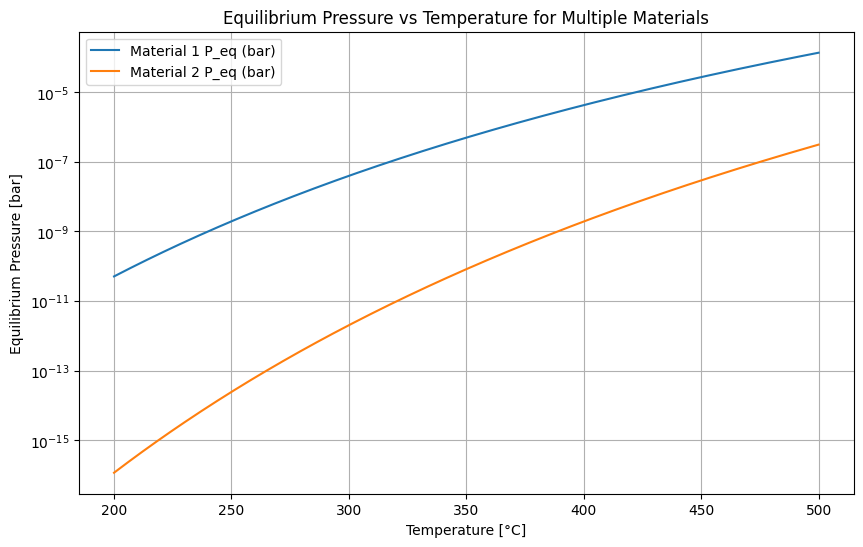

In [4]:
# ---------------- Visualization ----------------
plt.figure(figsize=(10,6))

# Pressure vs Temperature
for mat in materials:
    plt.semilogy(T, pressures[mat], label=f'{mat} P_eq (bar)')

plt.xlabel('Temperature [°C]')
plt.ylabel('Equilibrium Pressure [bar]')
plt.title('Equilibrium Pressure vs Temperature for Multiple Materials')
plt.legend()
plt.grid(True)
plt.show()


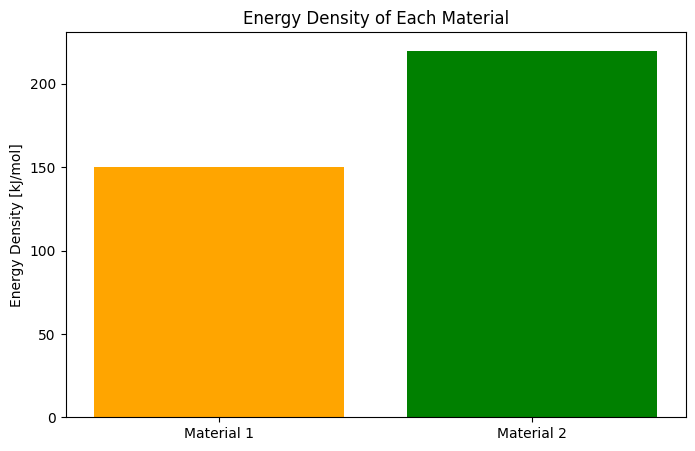

In [5]:
# Energy density per material
energy_vals = [energy_density(m["delta_H"]) for m in materials.values()]

plt.figure(figsize=(8,5))
plt.bar(materials.keys(), energy_vals, color=['orange','green'])
plt.ylabel('Energy Density [kJ/mol]')
plt.title('Energy Density of Each Material')
plt.show()


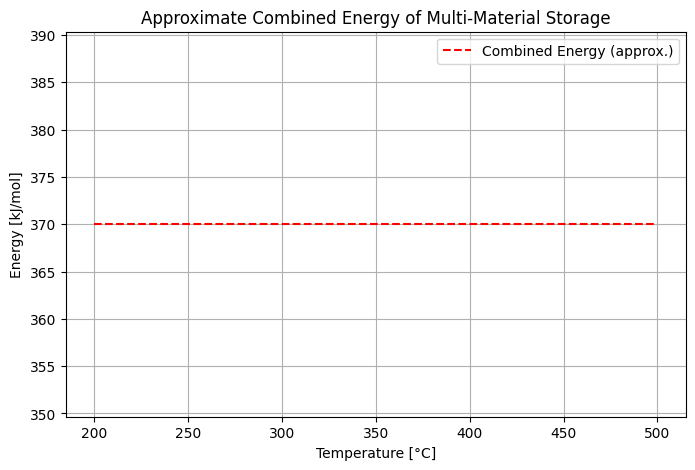

In [6]:
# Combined materials (simplified)
combined_energy = np.zeros_like(T)
for mat, props in materials.items():
    delta_H = props["delta_H"]
    combined_energy += delta_H  # Simplified sum

plt.figure(figsize=(8,5))
plt.plot(T, [combined_energy[0]]*len(T), 'r--', label='Combined Energy (approx.)')
plt.xlabel('Temperature [°C]')
plt.ylabel('Energy [kJ/mol]')
plt.title('Approximate Combined Energy of Multi-Material Storage')
plt.legend()
plt.grid(True)
plt.show()


## Discussion & Insights

- **Multi-material approach:** Combining two or more thermochemical materials allows tailoring of the operational temperature range and increases total energy density.
- **Equilibrium pressure:** Each material shows a distinct pressure vs temperature profile. This is important for designing the system to operate at a desired temperature and pressure range.
- **Energy density:** The combined energy density gives a simplified estimate of the total heat storage capacity, which can guide material selection and sizing of the storage system.
- **Practical applications:** 
  - Industrial waste heat storage and recovery.
  - High-temperature process heat for chemical plants.
  - Concentrated solar power plants using thermochemical storage.
- **Next steps:** 
  - Include material kinetics for charging/discharging rates.
  - Simulate realistic cycling with heat losses.
  - Optimize material mixtures for maximum efficiency and energy density.